In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

In [2]:
from sklearn import linear_model

In [3]:
def load_data(path, header):
    df = pd.read_csv(path, header = header)
    return df

In [26]:
# load insurance data with features {age, sex, bmi, children, smoker, region } and target charges
insurance_df = load_data("data/insurance.csv", header=0)

In [ ]:
insurance_df

In [27]:
X = insurance_df['bmi']
y = insurance_df['charges']

x_small =X[0:2]
y_small = y[0:2]

x_single = np.column_stack((np.ones(1), X[0:1]))
y_single = y[0:1]

X_full = np.column_stack((np.ones(X.shape[0]),X))

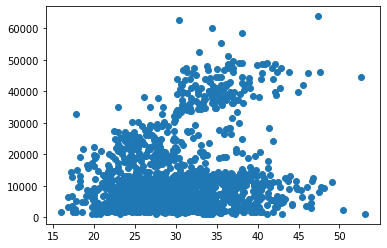

In [28]:
plt.scatter(X, y)

In [29]:
#Fit sklearn for comparison
lm = linear_model.LinearRegression()
model = lm.fit(X.values.reshape(-1,1), y)

In [30]:
model.coef_

array([393.8730308])

In [31]:
model.intercept_

1192.9372089611516

In [ ]:
lm = linear_model.LinearRegression()
model = lm.fit(X[0:2].values.reshape(-1,1), y[0:2])

In [ ]:
model.predict(X[0:2].values.reshape(-1,1))

In [ ]:
model.coef_

In [ ]:
#Add a columns of ones for theta_0
x_ready = np.column_stack((np.ones(2), x_small))

#Initialize theta to random values
theta = np.random.randn(2)

In [ ]:
h_theta = np.dot(x_ready, theta)

In [ ]:
(h_theta-y_small)

In [ ]:
x_ready

In [ ]:
(h_theta-y_small)*x_ready[:,1]

In [ ]:
(h_theta - y_small)*x_ready[:,1]

In [6]:
def mse_cost_function(x, y, theta):
    m = x.shape[0]
    h_theta = np.dot(x, theta)
    mse = 1/(2*m) * np.sum((h_theta - y)**2)
    return mse

In [ ]:
mse_cost_function()

In [ ]:
theta0 = np.arange(-100, 1500, 100)
theta1 = np.arange(-100, 1500, 100)

J_theta = np.zeros((theta0.size, theta1.size))
for i in range(0, theta0.size):
    for j in range(0, theta0.size):
        J_theta[i,j] = mse_cost_function(X_full, y, [theta0[i], theta1[j]])

In [ ]:
fig= plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(theta0, theta1, J_theta)

In [ ]:
y_hat = np.dot(x_input_var,theta)

In [ ]:
np.array([1.0, input_var]) 

In [ ]:
output_var[0]-y_hat

In [ ]:
np.array([1.0, input_var[0]]) * (output_var[0]-y_hat)

In [51]:
def vectorized_gradient_descent(x, y, theta):
    ''' Wonky in some way'''
    theta_new = theta
    theta_temp = np.zeros(theta.size)
    alpha = 0.0001
    max_iters = 20000
    m = x.shape[0]
    print("m = {}".format(m))
    mse = np.zeros(max_iters)
    #Epsilon measures cost convergence
    epsilon = 0.00001
    
    for i in range(0, max_iters):
        mse[i] = mse_cost_function(x, y, theta_new)
        if i > 1:
            cost_diff0 = abs(mse[i] - mse[i-1])
            cost_diff1 = abs(mse[i-1] - mse[i-2])
            if cost_diff0 < epsilon and cost_diff1 < epsilon:
                print("converged at iteration {}".format(i))
                break
        
        h_theta = np.dot(x, theta_new)
            #print("h_theta = {}, iter = {}, j={}".format(h_theta, i, j))
            #gradient = np.sum((h_theta-y)*x[:,j])
        gradient = np.dot((h_theta-y), x)
            #print("gradient: {}, x_j: {}".format(gradient, x[:,j]))
        theta_new = theta_new - (alpha/m)*gradient
        #Update theta_new with new values
        #print("theta_new = {}, theta_temp = {}".format(theta_new, theta_temp))
        #theta_new = theta_temp
    
    return theta_new, mse

In [5]:
def batch_gradient_descent(x, y, theta):
    theta_new = theta
    theta_temp = np.zeros(theta.size)
    alpha = 0.001
    max_iters = 20000
    m = x.shape[0]
    print("m = {}".format(m))
    mse = np.zeros(max_iters)
    #Epsilon measures cost convergence
    epsilon = 0.00001
    
    for i in range(0, max_iters):
        mse[i] = mse_cost_function(x, y, theta_new)
        if i > 1:
            cost_diff0 = abs(mse[i] - mse[i-1])
            cost_diff1 = abs(mse[i-1] - mse[i-2])
            if cost_diff0 < epsilon and cost_diff1 < epsilon:
                print("converged at iteration {}".format(i))
                break
        for x_sample,y_sample in zip(x, y):
            #Calculate estimated value of y
            h_theta = np.dot(x_sample, theta_new)
            #Calculate gradient
            gradient = (h_theta-y_sample)*x_sample
            theta_new = theta_new - (alpha/m)*gradient
       
    
    return theta_new, mse

In [ ]:
np.dot(x_ready, theta)

In [ ]:
X.shape

In [ ]:
theta_full

In [ ]:
cost

In [45]:
theta_full, cost = batch_gradient_descent(X_full, y, theta)

m = 1338


In [46]:
theta_full

array([646.79169107, 411.89868205])

In [ ]:
x_triv = np.column_stack((np.ones(2), [1, 2]))
y_triv = np.array([1,2])

In [ ]:
theta_triv, cost = gradient_descent(x_triv, y_triv, theta)

In [ ]:
#theta_small, cost = gradient_descent(x_ready, y_small, theta)

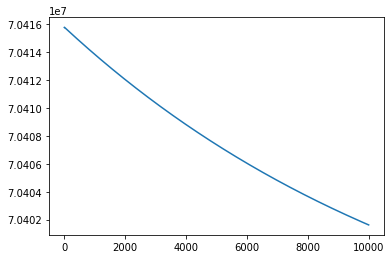

In [43]:
plt.plot(cost[10:])

In [ ]:
x_small

In [ ]:
y_small

In [ ]:
y_small

In [ ]:
theta_single, cost = batch_gradient_descent(x_single, y_single, theta)

In [ ]:
np.dot(x_single,theta_single)

In [ ]:
#theta = np.array([-0.4,1.4])
#theta = np.random.randn(2)
theta = np.zeros(2)

In [ ]:
x_trivial = np.arange(0,10)
y_triv = np.array([1,3,2,5,7,8,8,9,10,12])

x_triv = np.column_stack((np.ones(x_trivial.size), x_trivial))

theta_triv, cost = batch_gradient_descent(x_triv[0:2], y_triv[0:2], theta)

In [ ]:
theta_triv

In [7]:
"""Generate comparison data"""
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

In [9]:
x_input_var = np.column_stack([np.ones(input_var.shape[0]), input_var])

In [11]:
theta = np.zeros(2)

In [12]:
theta_test, test_cost = batch_gradient_descent(x_input_var, output_var, theta)

m = 100
converged at iteration 13690


In [13]:
theta_test

array([254.10755786,  10.9026826 ])

In [52]:
theta_test1, test_cost1 = vectorized_gradient_descent(x_input_var, output_var, theta)

m = 100


In [53]:
theta_test1

array([100.37840084,  13.27051517])

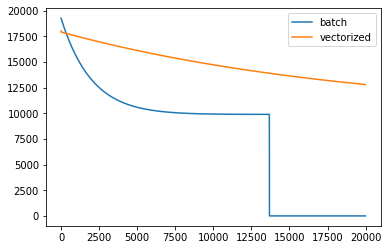

In [54]:
plt.plot(test_cost[10:], label = 'batch')
plt.plot(test_cost1[10:], label='vectorized')
plt.legend()

In [33]:
theta_full, cost_full = batch_gradient_descent(X_full, y, theta)

m = 1338


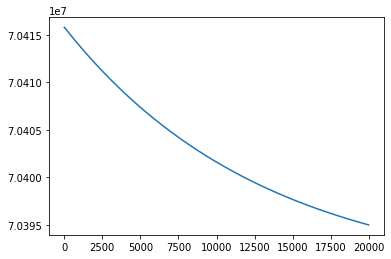

In [35]:
plt.plot(cost_full[10:])

In [36]:
theta_full

array([646.79169107, 411.89868205])

### Plot the insurance BMI and charges with sklearn fit and gradient descent fit

In [42]:
x_plot = np.arange(15, 50, 1)
y_20k = 646.79 + 411.90*x_plot
y_sklearn = 1192.94 + 393.87*x_plot

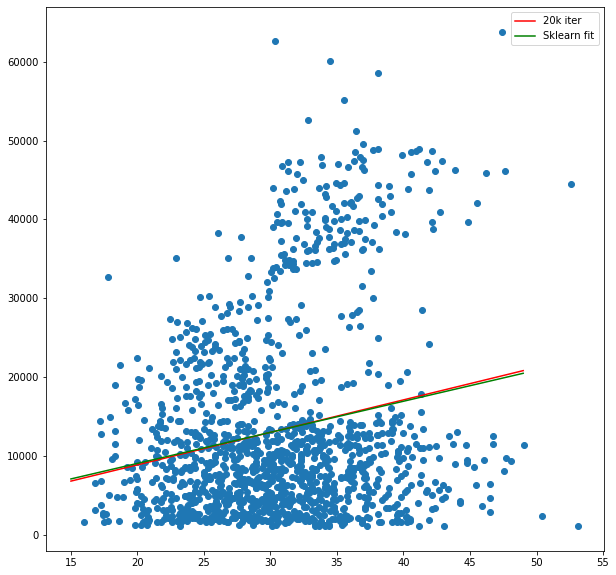

In [46]:
plt.figure(figsize = (10,10))
plt.scatter(X, y)
plt.plot(x_plot, y_20k, color='red', label = '20k iter')
plt.plot(x_plot, y_sklearn, color='green', label = 'Sklearn fit')
plt.legend()